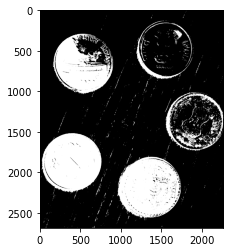

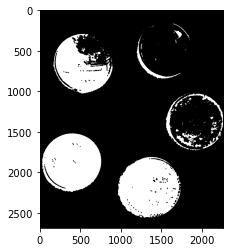

In [32]:
#SEGMENTATION PAR SEUILLAGE 
#Permet d'attenuer le bruit en pixel au dessus d'un seuil

# Importation des librairies 
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 
import os
  
# Ouverture de l'image
img = cv2.imread('piece_test_segmentation.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 


#Definir le seuil de pixels  
ret, thresh = cv2.threshold(gray, 0, 255, 
                            cv2.THRESH_BINARY_INV +
                            cv2.THRESH_OTSU) 

#Ces deux lignes permettent d'enregistrer l'image une fois traitée
#cv2.imwrite("dossier ou vous souhaitez enregistrer", thresh)
#cv2.imshow('image', thresh) 

#Affiche l'image 
plt.imshow(thresh, cmap='Greys_r')
plt.show()

#definir le noyau et appliquer le seuillage
kernel = np.ones((3, 3), np.uint8) 
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, 
                            kernel, iterations = 2) 
  
bg = cv2.dilate(closing, kernel, iterations = 1) 

dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0) 
ret, fg = cv2.threshold(dist_transform, 0.02
                        * dist_transform.max(), 255, 0) 
  

#cv2.imshow('image', fg)
plt.imshow(fg, cmap='Greys_r')
plt.show()

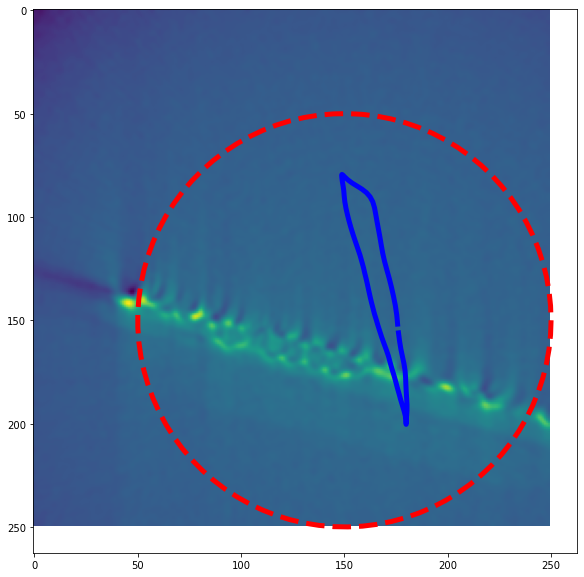

In [8]:
#SEGMENTATION PAR CONTOUR ACTIF
# Ce programme ne donne pas les résultats espérés

# Importation des librairies 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
  
# Ouverture de l'image
img = cv2.imread("/Users/leapommier/Desktop/projet multi/image test 2/imagerecdeuxiemeversion247.png") 
  
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Application filtre gaussien 
img2 = gaussian(img, 1)
  
# Creation du cercle autour de l'objet
x1 = 150+ 100*np.cos(np.linspace(0, 2*np.pi, 90))
x2 = 150 + 100*np.sin(np.linspace(0, 2*np.pi, 90))
snake = np.array([x1, x2]).T
  
#Application des forces du contour actif
snake_gray = active_contour(img2,snake)
 
#Dessine le contour avant les forces appliquées
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(img2)
  
# Dessine le contour après les forces appliqués au contour
ax.plot(snake_gray[:, 0],
        snake_gray[:, 1], 
        '-b', lw=5)

ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)


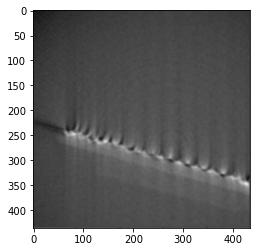

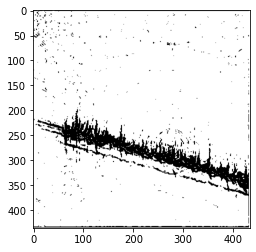

In [12]:
#TEST SEGMENTATION PAR BINARISATION
# Permet de récupérer uniquement l'objet dans l'image
# Ouverture de l'image initial
# Création d'une nouvelle image vide (image toute blanche)
# On parcourt l'image initial et on test chaque pixel
# Si la norme des 8 voisins du pixel est supérieure à une valeur seuil choisie afin d'éliminer le bruit (le fond de l'image)
# Alors le pixel est reformé sur l'image vide en Noir. 

# Importation des librairies 
from PIL import Image
from math import *

#Ouverture de l'image en noir et blanc initiale
image1 = Image.open('/Users/leapommier/Desktop/projet multi/Capture d’écran 2022-05-24 à 13.16.42.png') 

#Affiche l'image d'origine
plt.imshow(image1)
plt.show()

# Récupération des dimensions de l'image
dimx=image1.size[0] 
dimy=image1.size[1]

# Création d'une image vide.
image2 = Image.new ('RGB' , (dimx,dimy),(255,255,255)) 

#Binarisation
for  y in range(1,dimy-1) :
    for x in range ( 1,dimx-2):
        rvbCentre = image1.getpixel((x,y)) # le pixel central 
        rvbVoisin1= image1.getpixel((x+1,y-1)) # Les 8 vois
        rvbVoisin2= image1.getpixel((x-1,y+1))
        rvbVoisin3= image1.getpixel((x-1,y-1))
        rvbVoisin4= image1.getpixel((x+1,y+1))
        rvbVoisin5= image1.getpixel((x,y-1))
        rvbVoisin6= image1.getpixel((x,y+1))
        rvbVoisin7= image1.getpixel((x-1,y))
        rvbVoisin8= image1.getpixel((x+1,y))
        norme=sqrt((rvbVoisin1[1]-rvbVoisin2[2])**2+(rvbVoisin3[1]-rvbVoisin4[1])**2+(rvbVoisin5[1]-rvbVoisin6[1])**2+(rvbVoisin7[1]-rvbVoisin8[1])**2)
        if norme > 10 :
            image2.putpixel((x,y),(0,0,0))

#On sauvegarde la nouvelle image
image2.save("contour.jpg") 
plt.imshow(image2)
plt.show()


